In [72]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Always make it pretty.
plt.style.use('ggplot')


# The Bootstrap Approximation of Sampling Distributions

The Bootstrap is a common, computationally intensive procedure used to approximate the sampling distribution of any sample statistic (which is probably a point estimate of some unknown population parameter). Its power is derived from its generality: it applies to almost all sample statistics we may care about, while other methods (based primarily on the central limit theorem) only apply to the sample mean.


## Part 1: What is Bootstrapping and Why Do We Use It?

The general concept of bootstrapping is to create many samples from the one sample you actually have collected.

Hypothetically, since the sample we have actually collected is our best available approximation to the population we are studying, randomly redrawing new samples out of the original sample itself (with replacement) can simulate random samples from the original population.  In the bootstrap the statistic of interest is computed on each re-sample in order to provide an empirical approximation of the sampling distribution of that statistic. 

<br>

Implement a `bootstrap` function to randomly draw with replacement from a given sample. The function should take a sample as a `numpy ndarray` and the number of resamples as an integer  (`default: 10000`). The function should return a list of `numpy ndarray` objects, each ndarray is one bootstrap sample. 

In [47]:
def bootstrap(x, resamples=10000):
    """Draw bootstrap resamples from the array x.

    Parameters
    ----------
    x: np.array, shape (n, )
      The data to draw the bootstrap samples from.
    
    resamples: int
      The number of bootstrap samples to draw from x.
    
    Returns
    -------
    bootstrap_samples: np.array, shape (n, resamples)
      The bootsrap resamples from x.
    """
    bootstrap_sample_total = []
    for i in range(resamples):
        bootstrap_sample = np.random.choice(x, size=len(x), replace=True)
        bootstrap_sample_total.append(bootstrap_sample)
    return bootstrap_sample_total

In [48]:
data = stats.norm(0.1, 1.0).rvs(100)

In [49]:
bootstrap(data)

[array([ 2.21960975,  2.21960975, -0.5522116 ,  0.39617606,  1.02114684,
         0.18722136, -1.61705854, -1.83782284, -3.96381979,  2.21960975,
         1.79462056,  0.52480953, -1.76826066, -0.24016885, -0.10580725,
        -0.87465182, -2.20627932,  0.39617606,  0.71521744,  1.80011078,
        -0.24016885, -0.07340303,  1.95277456,  1.05028003, -1.44626972,
         0.6950276 ,  0.64415601,  1.79462056, -0.83948421, -0.16406775,
         0.24896912,  0.84383826,  0.89920495, -0.14447467, -1.54022963,
        -0.23304494,  0.35607819,  0.81571777, -0.40848063,  0.10053959,
         0.31586249, -0.40848063, -0.07340303, -1.69361486, -0.31892105,
         0.64415601,  0.6950276 ,  1.95096685, -2.7008822 ,  0.25755844,
         1.88961272,  0.14802512,  2.21960975,  1.24509843, -1.41156614,
         0.00925079,  0.31586249,  1.02284293,  0.35607819,  1.02114684,
        -0.77257526,  0.32367797,  0.24896912,  0.00925079, -1.50816349,
         1.39027228, -0.16406775, -0.83948421,  0.3

## Part 2: Bootstrap to find Confidence Interval of Mean

The bootstrap can be used to provide very simple confidence intervals for a population parameter.  The empirical quantiles of the bootstrapped sampling distribution can be used as confidence intervals, usuall called bootstrapped confidence intervals.

So for example, if, upon bootsrapping, you get

   ```python
   [1, 1, 1, 2, 2, 3, 4, 4, 5, 6]
   ```

as the bootstraped values of some sample statistic, then the interval `[1, 5]` would be a 20% confidence interval (where the 1 and the 5 are the 10th and 90th percentile of the array of boostrapped values).

Company X wants to find out if changing to Apple monitors increases its programmers' productivity. A random sample of 25 people is chosen and their monitors are switched. The difference between their productivity before and after the monitor switch is recorded in `data/productivity.txt`.
 
<br>

1. Load the data `data/productivity.txt`.

In [53]:
prod_data = np.loadtxt('/home/asus/sampling-distributions-dev/data/productivity.txt')
prod_data

array([-19.1, -15.2, -12.4, -15.4,  -8.7,  -6.7,  -5.9,  -3.5,  -3.1,
        -2.1,   4.2,   6.1,   7. ,   9.1,  10. ,  10.3,  13.2,  10.1,
        14.1,  14.4,  20.1,  26.3,  27.7,  22.2,  23.4])

2. Why is it inappropriate to only report the mean difference in productivity as evidence to support the decision of changing all the monitors to Apple monitors in the company?

In [54]:
# A mean difference is subject to skew, a median difference with a 
# confidence interval range would be better suited to measuring 
# the productivity difference

In [70]:
len(prod_data)

25

3. Implement a `bootstrap_ci` function to calculate the confidence interval of any sample statistic (in this case the `mean`). The function should take a sample, a function that computes the sample statistic, the number of resamples (`default: 10000`), and the confidence level (`default: 0.95`). The function should return the lower and upper bounds of the confidence interval and the bootstrap distribution of the test statistic.

In [199]:
def bootstrap_ci(sample, stat_function=np.mean, resamples=1000, ci=0.95):
    bootstrap_sample_95_total = []
    for i in range(resamples):
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        bootstrap_mean = stat_function(bootstrap_sample)
        bootstrap_percentile = np.percentile(bootstrap_mean, ci)
        bootstrap_sample_95_total.append(bootstrap_percentile)
        
    return bootstrap_sample_95_total

In [200]:
bootstrap_means = bootstrap_ci(prod_data, stat_function=np.mean)

4. Plot the bootstrap distribution of the means in a histogram. 


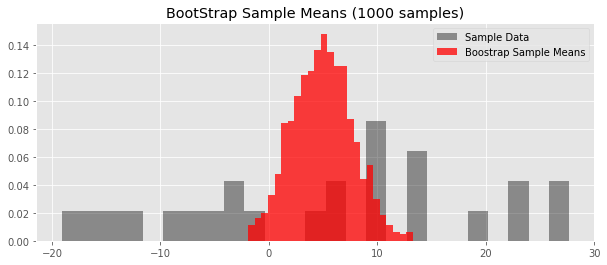

In [201]:
fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(prod_data, bins=25, normed=True, color='Black',alpha=0.4,
           label='Sample Data')
_ = ax.hist(bootstrap_means, bins=25, density=True, color='red',
           alpha=0.75, label='Boostrap Sample Means')
ax.legend()
_ = ax.set_title('BootStrap Sample Means (1000 samples)')

In [180]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])

In [181]:
def text_in_blank_plot(text, ax):
    _ = ax.text(0.5, 0.5, text, 
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=22)
    ax.axis('off')

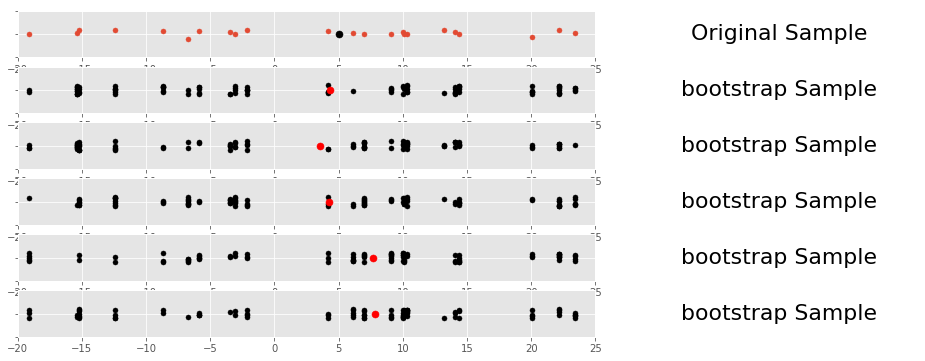

In [182]:
fig = plt.figure(figsize=(16, 6))

ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-20, 25)
one_dim_scatterplot(prod_data, ax, s=25)
ax.scatter(np.mean(prod_data), 0, c='black', s=50)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("Original Sample", ax)

for i in range(0, 5):
    bootstrap_sample = np.random.choice(prod_data, size=len(data), 
                                        replace=True)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-20, 25)
    one_dim_scatterplot(bootstrap_sample, ax, c='black', s=25)
    sample_mean = np.mean(bootstrap_sample)
    ax.scatter([sample_mean], 0, c='Red', s=50)
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot('bootstrap Sample', ax)

In [215]:
def bootstrap_ci(sample, stat_function=np.mean, resamples=1000, ci=0.95):
    boostrap_mean_total = []
    for i in range(resamples):
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        bootstrap_mean = stat_function(bootstrap_sample)
        boostrap_mean_total.append(bootstrap_mean)
        
    return bootstrap_mean_total

In [210]:
bootstrap_mean_total = bootstrap_ci(prod_data, stat_function=np.mean)
left_endpoint = np.percentile(bootstrap_mean_total, 2.5)
right_endpoint = np.percentile(bootstrap_mean_total, 97.5)

print("Bootstrap 95% Confidence Interval for Sample Population: [{:2.2f}, {:2.2f}]".format(
    left_endpoint, right_endpoint))

Bootstrap 95% Confidence Interval for Sample Population: [0.22, 10.19]


5. Based on the bootstrap confidence interval, what conclusions can you draw? What about if a 90% confidence interval were used instead? 

In [211]:
bootstrap_means = bootstrap_ci(prod_data, stat_function=np.mean, ci=90)

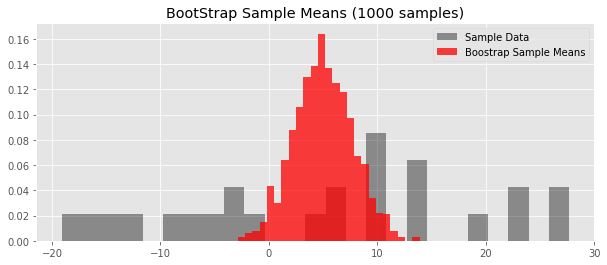

In [225]:
fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(prod_data, bins=25, normed=True, color='Black',alpha=0.4,
           label='Sample Data')
_ = ax.hist(bootstrap_means, bins=25, density=True, color='red',
           alpha=0.75, label='Boostrap Sample Means')
ax.legend()
_ = ax.set_title('BootStrap Sample Means (1000 samples)')

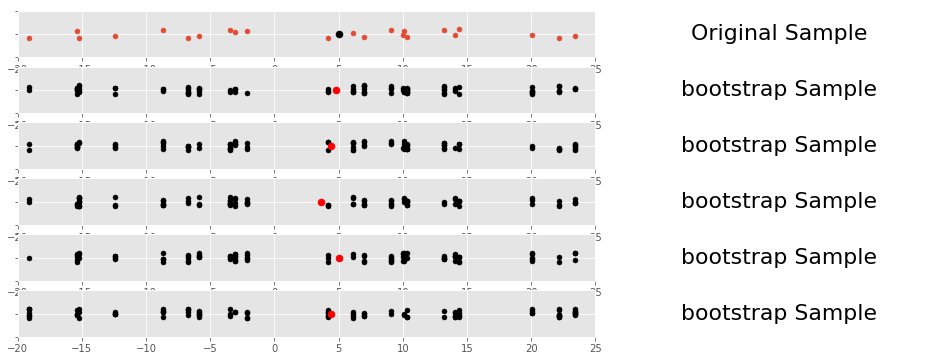

In [213]:
fig = plt.figure(figsize=(16, 6))

ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-20, 25)
one_dim_scatterplot(prod_data, ax, s=25)
ax.scatter(np.mean(prod_data), 0, c='black', s=50)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("Original Sample", ax)

for i in range(0, 5):
    bootstrap_sample = np.random.choice(prod_data, size=len(data), 
                                        replace=True)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-20, 25)
    one_dim_scatterplot(bootstrap_sample, ax, c='black', s=25)
    sample_mean = np.mean(bootstrap_sample)
    ax.scatter([sample_mean], 0, c='Red', s=50)
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot('bootstrap Sample', ax)

In [219]:
bootstrap_mean_total = bootstrap_ci(prod_data, stat_function=np.mean)
low_CI = np.percentile(bootstrap_mean_total, 5.0)
upper_CI = np.percentile(bootstrap_mean_total, 95.0)

print("Bootstrap 95% Confidence Interval for Sample Population: [{:2.2f}, {:2.2f}]".format(
    left_endpoint, right_endpoint))

Bootstrap 95% Confidence Interval for Sample Population: [0.93, 9.51]


5. Based on the bootstrap confidence interval, what conclusions can you draw? What about if a 90% confidence interval were used instead? 
   
   Suppose there are 100 programmers in the company. The cost of changing a monitor is 500 and the increase of one unit of productivity is worth 2,000, would you recommend switching the monitors? State the assumptions you are making and show your work.

In [227]:

# Using a 95% confidence interval we can expect our mean to be within 
# this range 95% of the time. Although this is a naivee approach
# because negative productivity isn't considered. But because the mean
# is aproximately 5, we can estimate there would be a net profit of 
# aproximately 60k

# Using 90% confidence interval we can expect the same outcome except we
# would only be 90% confident that our mean fell within this range


## Part 3: Bootstrap to find Confidence Interval of Correlation

You are interested if there is a positive correlation between the LSAT admission exam score and the first year GPA achieved in law schools. You are given the mean LSAT and mean GPA scores for the students from a sample of 15 law schools.

<br>

1. Load the data `data/law_sample.txt`


In [230]:
law_data = np.loadtxt('/home/asus/sampling-distributions-dev/data/law_sample.txt')
law_data

array([[576.  ,   3.39],
       [635.  ,   3.3 ],
       [558.  ,   2.81],
       [578.  ,   3.03],
       [666.  ,   3.44],
       [580.  ,   3.07],
       [555.  ,   3.  ],
       [661.  ,   3.43],
       [651.  ,   3.36],
       [605.  ,   3.13],
       [653.  ,   3.12],
       [575.  ,   2.74],
       [545.  ,   2.76],
       [572.  ,   2.88],
       [594.  ,   2.96]])

In [243]:
x = law_data[:,0]
y = law_data[:,1]

In [244]:
import scipy
scipy.stats.pearsonr(x,y)

(0.776374491289407, 0.0006651020111028162)